In [24]:
print("Welcome to linear regression model")
print("This model will help you to predict the price of a house based on the number of rooms in the house")
print("Dataset source : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset")
print("Read about Linear regression here : https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/")

Welcome to linear regression model
This model will help you to predict the price of a house based on the number of rooms in the house
Dataset source : https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
Read about Linear regression here : https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [27]:
df.columns
# label must be price and feature must be the rest of the columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [28]:
df.describe()
# statistical summary of the dataset - not that I get everything , but okay.

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\vksai\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


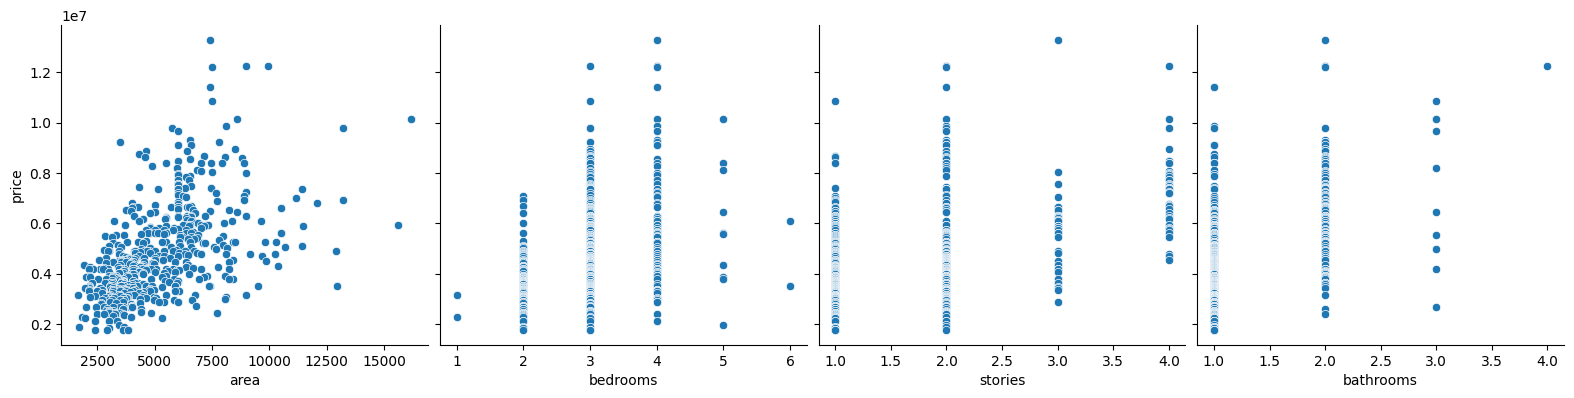

In [29]:
sns.pairplot(df, x_vars=[ 'area', 'bedrooms','stories','bathrooms' ], y_vars = 'price', size = 4, kind = 'scatter' )
plt.show()
# cool, it is plotting price against area, bedrooms and stories. I can see the relationship between price and the features

In [68]:
X = df['bedrooms']
y = df['price']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [70]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(381,)
(164,)
(381,)
(164,)


In [71]:
import statsmodels.api as sm

In [72]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [73]:
lr.params
# perhaps the value of the slope and the intercept

const       2.222550e+06
bedrooms    8.644292e+05
dtype: float64

In [74]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     52.85
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.08e-12
Time:                        00:35:52   Log-Likelihood:                -6007.2
No. Observations:                 381   AIC:                         1.202e+04
Df Residuals:                     379   BIC:                         1.203e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.223e+06   3.59e+05      6.184      0.0

In [75]:
# idek what is happening here, but I think I am getting the summary of the linear regression model. I can see the p-values, R-squared value, etc.
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [76]:
y_pred.head()

265    4.815838e+06
54     4.815838e+06
171    4.815838e+06
244    4.815838e+06
268    5.680267e+06
dtype: float64

In [77]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#RMSE value
print( "RMSE: ",np.sqrt( mean_squared_error( y_test, y_pred ) ))
#R-squared value
print( "R-squared: ",r2_score( y_test, y_pred ) )



RMSE:  1821079.2280259414
R-squared:  0.1552930954851608


In [78]:
np.sqrt( mean_squared_error( y_test, y_pred ) )

1821079.2280259414

In [79]:
r_squared = r2_score( y_test, y_pred )
r_squared

0.1552930954851608